In [1]:
import tensorflow as tf
import numpy as np
from scipy.misc import imread, imresize
from imagenet_classes import class_names

import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

In [2]:
# dir for tensorboard file (for graph visualization)
logs_path = 'logs/0.2/'

if tf.gfile.Exists(logs_path):
    tf.gfile.DeleteRecursively(logs_path)
tf.gfile.MakeDirs(logs_path)

In [3]:
# information about image size
IMG_W = 224
IMG_H = 224
CHANNELS = 3

### Load an image for classification 

uint8


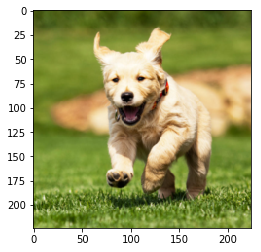

In [4]:
img1 = imread('images/dog.jpg')
img1 = imresize(img1, (IMG_W, IMG_H))
img1 = img1.reshape((1, IMG_W, IMG_H, CHANNELS))
print(img1.dtype)
plt.imshow(img1[0])

## Create VGG networks 

In [5]:
config = tf.ConfigProto()
# this type of configuration is for GPU 
# TensorFlow will not allow all the GPU memory 
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)

In [6]:
VGG19_weights_file = "data/VGG/vgg19.npy"
VGG16_weights_file = "data/VGG/vgg16.npy"

In [7]:
from VGG import generate_VGG19, generate_VGG16

In [8]:
with tf.name_scope('VGG16_a'):
    vgg16_a, vgg16_scope = generate_VGG16(VGG16_weights_file,
                                          scope="VGG16_factory",
                                          remove_top=False,
                                          input_shape=(1, IMG_W, IMG_H, CHANNELS),
                                          input_tensor=None,
                                          apply_preprocess=True)

In [9]:
print(type(vgg16_a))
pprint(vgg16_a)
print(type(vgg16_scope))
print(vgg16_scope.name)

<class 'dict'>
{'conv1_1': <tf.Tensor 'VGG16_a/VGG16_factory/conv1_1/conv1_1_1:0' shape=(1, 224, 224, 64) dtype=float32>,
 'conv1_2': <tf.Tensor 'VGG16_a/VGG16_factory/conv1_2/conv1_2_1:0' shape=(1, 224, 224, 64) dtype=float32>,
 'conv2_1': <tf.Tensor 'VGG16_a/VGG16_factory/conv2_1/conv2_1_1:0' shape=(1, 112, 112, 128) dtype=float32>,
 'conv2_2': <tf.Tensor 'VGG16_a/VGG16_factory/conv2_2/conv2_2_1:0' shape=(1, 112, 112, 128) dtype=float32>,
 'conv3_1': <tf.Tensor 'VGG16_a/VGG16_factory/conv3_1/conv3_1_1:0' shape=(1, 56, 56, 256) dtype=float32>,
 'conv3_2': <tf.Tensor 'VGG16_a/VGG16_factory/conv3_2/conv3_2_1:0' shape=(1, 56, 56, 256) dtype=float32>,
 'conv3_3': <tf.Tensor 'VGG16_a/VGG16_factory/conv3_3/conv3_3_1:0' shape=(1, 56, 56, 256) dtype=float32>,
 'conv4_1': <tf.Tensor 'VGG16_a/VGG16_factory/conv4_1/conv4_1_1:0' shape=(1, 28, 28, 512) dtype=float32>,
 'conv4_2': <tf.Tensor 'VGG16_a/VGG16_factory/conv4_2/conv4_2_1:0' shape=(1, 28, 28, 512) dtype=float32>,
 'conv4_3': <tf.Tensor 'V

### Classification 

In [ ]:
sess.run(tf.global_variables_initializer())
_ = sess.run(vgg16_a['input'].assign(img1))

In [ ]:
prob = sess.run(vgg16_a['prob'])[0]
preds = (np.argsort(prob)[::-1])[0:5]
for p in preds:
    print(class_names[p], prob[p])

In [ ]:
writer = tf.summary.FileWriter(logs_path, sess.graph)

Now, go to tensorboard : `tensorboard --logdir=logs/0.2/`

## Create new VGG networks 


In [ ]:
with tf.name_scope('VGG16_b'):
    vgg16_b, _ = generate_VGG16(VGG16_weights_file,
                                scope=vgg16_scope,
                                remove_top=False,
                                input_shape=(1, IMG_W, IMG_H, CHANNELS),
                                input_tensor=None,
                                apply_preprocess=True)

In [ ]:
print(type(vgg16_b))
print(type(vgg16_scope))

In [ ]:
# need to perform again the variable initialization for vgg16_b
sess.run(tf.global_variables_initializer())
_ = sess.run(vgg16_a['input'].assign(img1))
_ = sess.run(vgg16_b['input'].assign(img1))

In [ ]:
prob = sess.run(vgg16_b['prob'])[0]
preds = (np.argsort(prob)[::-1])[0:5]
for p in preds:
    print(class_names[p], prob[p])

In [ ]:
writer.add_graph(sess.graph)

--> Go to TensorBoard ! 

### New VGG factory

In [ ]:
with tf.name_scope('VGG16_c'):
    vgg16_c, new_vgg_scope = generate_VGG16(VGG16_weights_file,
                                scope="new_factory",
                                remove_top=False,
                                input_shape=(1, IMG_W, IMG_H, CHANNELS),
                                input_tensor=None,
                                apply_preprocess=True)
with tf.name_scope('VGG16_d'):    
    vgg16_d, _ = generate_VGG16(VGG16_weights_file,
                                scope=new_vgg_scope,
                                remove_top=False,
                                input_shape=(1, IMG_W, IMG_H, CHANNELS),
                                input_tensor=None,
                                apply_preprocess=True)

In [ ]:
# we created two new VGG16 networks, but into a new VGG factory.
writer.add_graph(sess.graph)

In [ ]:
writer.close()